## Logan Henslee

## Pfizer Vaccine Tweets NLP Project: VADER & Positivie/Negative Word Count Using Lexicon

#### **Analysis and report conclusion created May 4, 2021.**  

Dataset Source:  https://www.kaggle.com/gpreda/pfizer-vaccine-tweets



This project will focus on finding the sentiment of tweets concerning the Covid vaccine produced by Pfizer. Understanding the sentiment around the Pfizer vaccine will be helpful in understanding how the public feels, and indicate how receptive they are to taking the vaccine. To do this I will use an unannotated twitter dataset from Kaggle and perform an NLP Sentiment Analysis with a combination of various techniques. There are 2 ways to perform this analysis:

- I will first use a Positive Word and Negative Word lexicon (each drawn from text files) to conduct exploratory analysis and find the total number of positive words and negative words in the tweets. The lexicons are a list of words that are associated as normally being positive or negative, which we can store as list. This method only counts the number of Positive and Negative words but does not consider the context around those words. For example, if a person tweets 'did not love', the word love is in the positive lexicon so the tweet is classified as positive. This method is more simple in its evaluation of sentiment and can be misleading in this scenario. To find these Positve/Negative word text files please go to GitHub link: https://github.com/loganhenslee/Vaccine-Twitter-Sentiment-Analysis

- Secondly I will use VADER(Valence Aware Dictionary and sEntiment Reasoner) which is a lexicon and rule-based sentiment analysis tool that works especially well with social media texts. VADER is unique because it gives us polarity scores and can give us the intesity of the positive or negative tweet. VADER is able to not only map positive and negative words to the correct sentiment, but uses the context of the surrounding words to understand the tweets true sentiment. A person might tweet,"did not love", and VADER will classify it as negative, and not be confused by the positive word 'love'. This shows that VADER has been trained to better classify nuance in text. For this reason it works better for social media commments than a traditional Lexicon Word Counter. It is downloadable from the NLTK package and can be applied to unlabeled data.
    The VADER tools source can be found here: https://github.com/cjhutto/vaderSentiment

    Citation: Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

With the SentimentIntensityAnalyzer imported from VADER, we can not only gather count of sentiment for the tweets, but classify them and create a new column that labels the tweet Positive, Negative, or Neutral. This labeling can be used to show difference between sentiment. I will also show how sentiment has looked over time.

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%pylab inline
import string
import time
import itertools
import plotly.express as px
import csv
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Part 1: Lexicon Analysis w/txt files and EDA

In [7]:
df = pd.read_csv('vaccination_tweets.csv').fillna('')

In [8]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8082 non-null   int64 
 1   user_name         8082 non-null   object
 2   user_location     8082 non-null   object
 3   user_description  8082 non-null   object
 4   user_created      8082 non-null   object
 5   user_followers    8082 non-null   int64 
 6   user_friends      8082 non-null   int64 
 7   user_favourites   8082 non-null   int64 
 8   user_verified     8082 non-null   bool  
 9   date              8082 non-null   object
 10  text              8082 non-null   object
 11  hashtags          8082 non-null   object
 12  source            8082 non-null   object
 13  retweets          8082 non-null   int64 
 14  favorites         8082 non-null   int64 
 15  is_retweet        8082 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 899.9+ KB


#### Number of tweets overtime

In [10]:
# Number of tweets overtime
import plotly.express as px
px.histogram(df, x="date",  nbins=100,opacity=.5,title="Tweets by date")

#### Verified vs Unverified
- The number of Non-verified users is much greater than verified users. Often Verified users are pehaps news organizations or social media influencers. Non-verified users are likley people who have less reach in terms of social media following and have less influence. Therefore this dataset could represent how the public feels at large about the Pfizer vaccine. 

Text(0.5, 1.0, 'Verified Users')

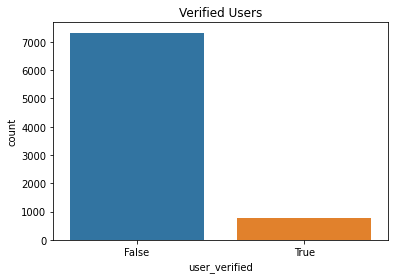

In [11]:
sns.countplot(data=df,x='user_verified').set_title('Verified Users')

#### Hashtags

- We see that the top hashtags used revolve around covid and pfizer mainly. However the word vaccine and moderna (which is a seperate covid vaccine) are in the list. That could mean some of the tweet data could indicate how the public feels in general about all covid vaccines, not just pfizer. 

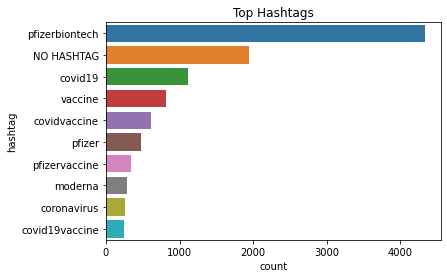

In [12]:
def get_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

df = df.copy()
df['hashtag'] = df['hashtags'].apply(lambda row : get_hashtags(row))
df = df.explode('hashtag')
df['hashtag'] = df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
df.loc[df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'


ds = df['hashtag'].value_counts().reset_index()
ds.columns = ['hashtag', 'count']
ds = ds.sort_values(['count'],ascending=False)
fig = sns.barplot(
    x=ds.head(10)["count"], 
    y=ds.head(10)['hashtag'], 
    orientation='horizontal', 
).set_title('Top Hashtags')

#### Building the LexiconClassifier

- The Lexicon Classifer is what will be used to incoporate the positive-words.txt and negative-words.txt files into the analysis. We will use these text files to find how many positive and negative words are used in the tweet dataset. These text files can be found online. The text files used in this analysis were given by Professor Gianluca Zanella of the Univeristy of Texas at San Antonio, professor in the Masters of Science in Data Analytics program. Here is a link to my GitHub which contains the positive and negative text files used. https://github.com/loganhenslee/Vaccine-Twitter-Sentiment-Analysis/tree/main

In [13]:
class LexiconClassifier():
    def __init__(self):
        self.positive_words = set()
        with open('positive-words.txt', encoding = 'utf-8') as iFile:
            for row in iFile:
                self.positive_words.add(row.strip())
        self.negative_words = set()
        with open('negative-words.txt', encoding='iso-8859-1') as iFile:
            for row in iFile:
                self.negative_words.add(row.strip())
            
    def predict(self, sentence):
        num_pos_words = 0
        num_neg_words = 0
        for word in sentence.lower().split():
            if word in self.positive_words:
                num_pos_words += 1
            elif word in self.negative_words:
                num_neg_words += 1
 
        pred = 'neutral' 
        if num_pos_words > num_neg_words:
            pred = 'positive'
        elif num_pos_words < num_neg_words:
            pred = 'negative'
        return pred
 
    def count_pos_words(self, sentence):
        num_pos_words = 0
        for word in sentence.lower().split():
            if word in self.positive_words:
                num_pos_words += 1
        return num_pos_words

    def count_neg_words(self, sentence):
        num_neg_words = 0
        for word in sentence.lower().split():
            if word in self.negative_words:
                num_neg_words += 1
        return num_neg_words

In [14]:
df.drop_duplicates(subset=['text'])

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hashtag
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,pfizerbiontech
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,,Twitter Web App,1,1,False,NO HASHTAG
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,coronavirus
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",,Twitter Web App,446,2129,False,NO HASHTAG
4,1337854064604966912,Citizen News Channel,,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,whereareallthesickpeople
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,1381891596459859969,Prof. Guy Ashton,,Professor of tropical medicine and infectious ...,2020-03-18 07:59:46,238,249,32754,False,2021-04-13 08:46:45,"Off for my second vaccine, then work. 👋💉\n#Cur...","['Cured', 'PfizerBioNTech']",Twitter for Android,0,4,False,cured
8078,1381873083598839816,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,143996,462,197,False,2021-04-13 07:33:11,“When” appears to be a million-dollar question...,,Twitter for iPhone,0,0,False,NO HASHTAG
8079,1381839418055532546,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 05:19:25,Second #PfizerBioNTech vaccine shot done! Than...,"['PfizerBioNTech', 'HongKong', 'HKTwitterGetsV...",Twitter for iPhone,0,4,False,pfizerbiontech
8080,1381824559519723523,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 04:20:22,Second #PfizerBioNTech vaccine is officially i...,"['PfizerBioNTech', 'HongKong', 'HK']",Twitter for iPhone,0,3,False,pfizerbiontech


#### Count positive and negative words

- Here, the number of positive and negative words is counted after calling the LexiconClassifier.

In [15]:
myLC = LexiconClassifier()

lex_count_pos = []
lex_count_neg = []


for t in df['text']:
    lex_count_pos.append(myLC.count_pos_words(t))
    
for i in df['text']:
    lex_count_neg.append(myLC.count_neg_words(i))

### Results for Part 1

- The count of positive words is higher than negative words. Just from this small analysis we can make an inference that the public feels a positive sentiment to the Pfizer vaccine than negative. However, in part 2, there is a more complex lexicon analysis that can be done with VADER to more accuratley define the amount of postive and negative sentiment (and neutral) tweets for the Pfizer vaccine. The numbers should be pos: 5994, neg:3507

In [16]:
print(sum(lex_count_pos))
print(sum(lex_count_neg))

5994
3507


## Part 2: Sentiment Analysis using VADER

- VADER is a lexicon and rule-based sentiment analysis tool. It is used for sentiment analysis text which has both polarities of positive and negative. It can also detail neutral sentiments as well if specified. It also does not require any training data, which works well with this Kaggle dataset since it is un-annotated. Below the tweet dataset is reloaded into a new dataframe. Text is left unchanged as punctuation, case size, and stopwords are all relevant to how VADER evaluates sentiment. Only a few things within the text are changed to better help read in text data.

- VADER can use punctuation and case (tweets with caps) to gather polarity scores. 

- This function will allow us to label the tweets sentiment as Positive, Negative, or Neutral. After gathering the sentiment of each text, the sentiments are counted and graphed below.

#### Sentiment Intensity Analyzer, Text Unchanged.

In [17]:
import re
### Now create sentiment for each tweet using VADER.
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
#nltk.download('vader_lexicon')

df2 = pd.read_csv('vaccination_tweets.csv').fillna('')

def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    return text
    


df2['text'] = df2['text'].apply(lambda x:clean(x))
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(df2['text'])):
    
    score = analyser.polarity_scores(df2['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df2['Sentiment']=pd.Series(np.array(sentiment))

Neutral     3421
Positive    3242
Negative    1419
Name: Sentiment, dtype: int64


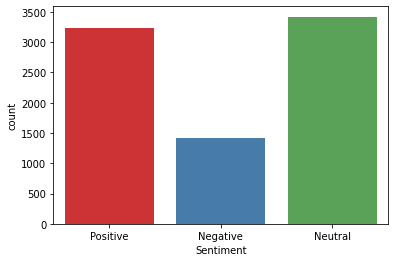

In [18]:
sns.countplot(x="Sentiment", data=df2, palette="Set1")
print(df2.Sentiment.value_counts())

#### Results of Part 2: 

- We see in the plot below that positive sentiment has remained consistenly higher than negative sentiment since December 2020. And we see that the sentiment of the Pfizer tweets are positive over negative by about more than half according to the barchart above. 

<AxesSubplot:title={'center':'Sentiment Over time'}, xlabel='Date', ylabel='Count'>

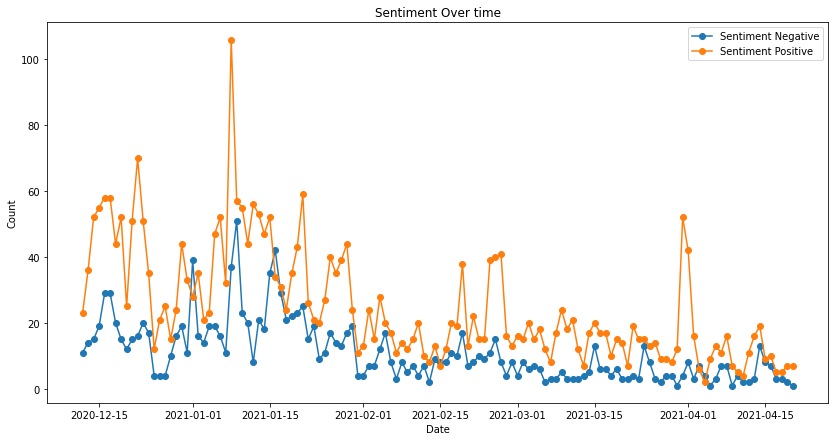

In [19]:
df2['date'] = pd.to_datetime(df2['date']).dt.date
negative_data = df2[df2['Sentiment']=='Negative'].reset_index()
positive_data = df2[df2['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 7), marker='o', xlabel='Date', ylabel='Count', title='Sentiment Over time')

In [20]:
df2.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,,Twitter Web App,1,1,False,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",,Twitter Web App,446,2129,False,Neutral
4,1337854064604966912,Citizen News Channel,,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Neutral


## Final Conclusion

In todays climate, it can be hard to gain a full understanding about how the public feels on any particular topic especially when technology and algorithms on various platforms groups people together who both think alike and share similar views. This is true even for vaccines as some people are for or against them.  But it is hard to quantify without data just how polarized a subject might be and makes decision makers and the public unsure how the world exactly feels about that subject.  This project will help to make an inference on the sentiment of the Pfizer vaccine with the use of a tweet dataset. 

From the analysis above, we can make the strong inference that there is a positive sentiment towards the Pfizer vaccine. The lexicon analysis in part 1 and the VADER analysis in part 2 both have higher counts of positive tweets. And we see from part 2, that the positive sentiment has been consistently higher over time since December 2020. 

VADER may not be perfect in getting every tweets sentiment correct, but it shows a quick way to gather sentiment and how NLP can help get intital findings.

Furhter sentiment can be measured as more tweets are created.